In [2]:
import pickle
import os
import sys

# include parent directory in path
parent_dir = os.path.abspath('../..')
sys.path.append(parent_dir)

if os.path.exists('clients.pkl'):
    with open('clients.pkl', 'rb') as file:
        clients = pickle.load(file)
else:
    print('No clients found')


In [3]:
# imports
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd


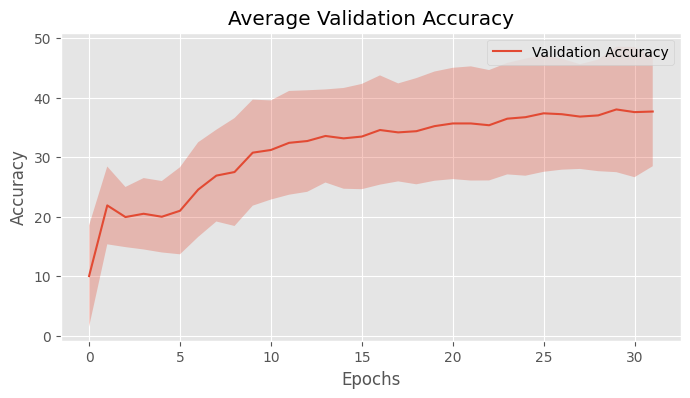

In [4]:
plt.figure(figsize=(8, 4))
avg_acc = np.mean([client.val_acc_list for client in clients], axis=0)
std_acc = np.std([client.val_acc_list for client in clients], axis=0)
plt.plot(avg_acc)
plt.fill_between(range(len(avg_acc)), avg_acc - std_acc, avg_acc + std_acc, alpha=0.3)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Validation Accuracy')
plt.legend(['Validation Accuracy'])


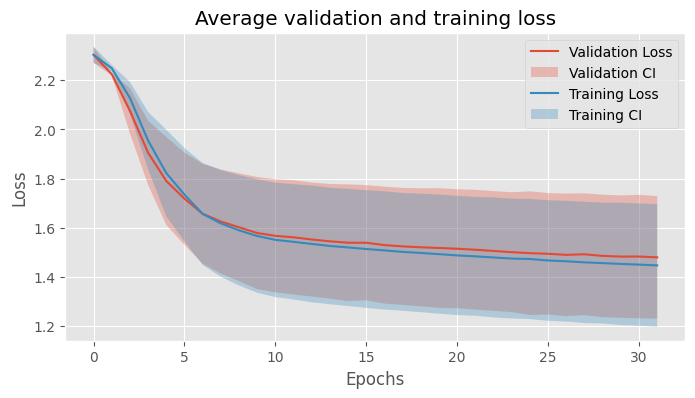

In [5]:
plt.figure(figsize=(8, 4))
avg_val_loss = np.mean([client.val_loss_list for client in clients], axis=0)
std_val_loss = np.std([client.val_loss_list for client in clients], axis=0)
plt.plot(avg_val_loss)
plt.fill_between(range(len(avg_val_loss)), avg_val_loss - std_val_loss, avg_val_loss + std_val_loss, alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('Loss')

avg_train_loss = np.mean([client.train_loss_list for client in clients], axis=0)
std_train_loss = np.std([client.train_loss_list for client in clients], axis=0)
plt.plot(avg_train_loss)
plt.fill_between(range(len(avg_train_loss)), avg_train_loss - std_train_loss, avg_train_loss + std_train_loss, alpha=0.3)

plt.title('Average validation and training loss')
plt.legend(['Validation Loss', 'Validation CI', 'Training Loss', 'Training CI'])
plt.show()

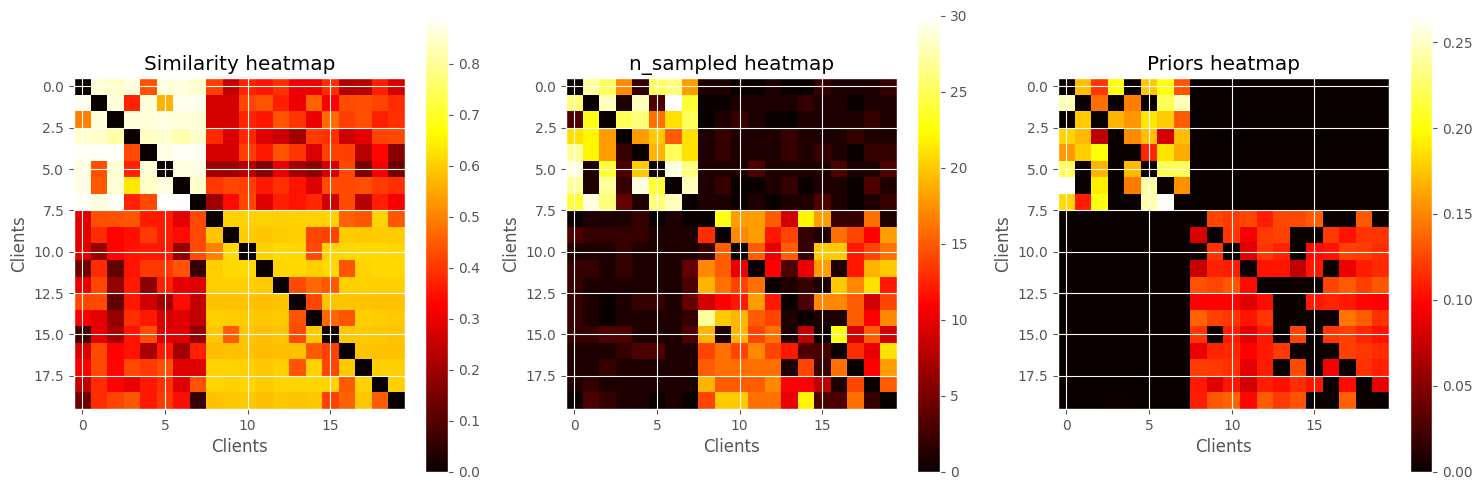

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Similarity heatmap
similarity_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    similarity_matrix[i] = client.similarity_scores
im = axes[0].imshow(similarity_matrix, cmap='hot', interpolation='nearest')
axes[0].set_title('Similarity heatmap')
axes[0].set_xlabel('Clients')
axes[0].set_ylabel('Clients')
fig.colorbar(im, ax=axes[0])


# n_sampled heatmap
n_sampled_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    n_sampled_matrix[i] = client.n_sampled
im = axes[1].imshow(n_sampled_matrix, cmap='hot', interpolation='nearest')
axes[1].set_title('n_sampled heatmap')
axes[1].set_xlabel('Clients')
axes[1].set_ylabel('Clients')
fig.colorbar(im, ax=axes[1])

# priors heatmap
priors_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    priors_matrix[i] = client.priors
im = axes[2].imshow(priors_matrix, cmap='hot', interpolation='nearest')
axes[2].set_title('Priors heatmap')
axes[2].set_xlabel('Clients')
axes[2].set_ylabel('Clients')
fig.colorbar(im, ax=axes[2])

plt.tight_layout()
plt.show()


In [7]:
plt.figure(figsize=(8, 4))
client_0_similarities = clients[0].all_similarities
print(client_0_similarities)
for i in range(1, len(clients)):
    plt.plot(client_0_similarities[:, i])
    
plt.xlabel('Time')
plt.ylabel('Similarity')
plt.title('Client 0 Similarity to Other Clients')
plt.legend(['Client {}'.format(i) for i in range(1, len(clients))])
plt.show()


[0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, array([0.        , 0.85567914, 0.84338981, 0.8606083 , 0.43552027,
       0.85640402, 0.86092364, 0.84629835, 0.40929348, 0.24532072,
       0.37549849, 0.35631014, 0.38817201, 0.30554858, 0.30060629,
       0.38744209, 0.22550952, 0.23171625, 0.36816224, 0.26966654]), array([0.        , 0.85567914, 0.84338981, 0.8606083 , 0.43552027,
       0.85640402, 0.86092364, 0.84629835, 0.40929348, 0.24532072,
       0.37549849, 0.35631014, 0.38817201, 0.30554858, 0.30060629,
       0.38744209, 0.22550952, 0.23171625, 0.36816224, 0.26966654]), array([0.        , 0.85567914, 0.843389

TypeError: list indices must be integers or slices, not tuple

<Figure size 800x400 with 0 Axes>

In [8]:
import torch

num_params = sum(p.numel() for p in clients[0].local_model.parameters())
print("Number of parameters in client[0].local_model:", num_params)


Number of parameters in client[0].local_model: 62006
